In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.sample(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8117,8118,15639117,Sorenson,624,Spain,Female,34,6,0.00,1,1,0,582.59,1
1964,1965,15738318,Kung,800,France,Female,40,5,97764.41,1,1,0,98640.15,1
1705,1706,15612771,Bell,452,France,Male,35,4,148172.44,1,1,1,4175.68,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_4916\4153051323.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


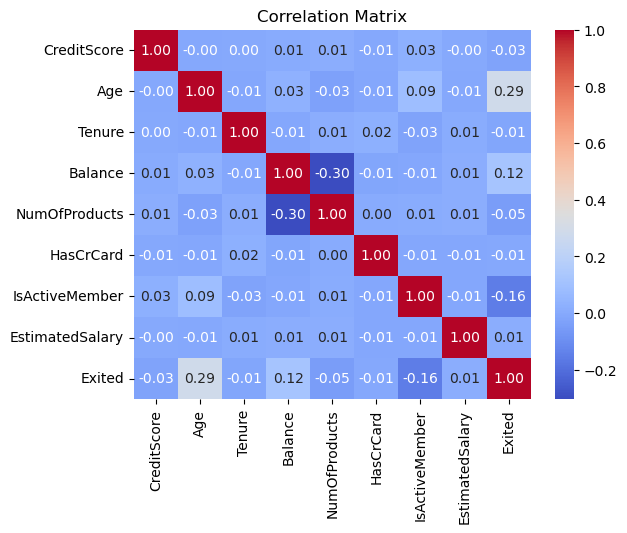

In [8]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [9]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [12]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [13]:
df['Geography'].replace({'France':0, 'Spain':1, 'Germany':2}, inplace = True)

In [15]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,772,2,0,42,3,75075.31,2,1,0,92888.52,1


In [19]:
from sklearn.model_selection import train_test_split
x = df.drop('Exited', axis= 1)
y = df.Exited
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
model = keras.Sequential([
    keras.layers.Dense(11, input_shape=(10,),activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer= 'adam',
             loss= 'binary_crossentropy',
             metrics=['accuracy'])
#model.compile(optimizer = 'adam',
             #loss = 'binary_crossentropy',
             #metrics=['accuracy'])

model.fit(x_train,y_train, epochs= 100)

Epoch 1/100
250/250 [==============================] - 0s 673us/step - loss: 6478.4087 - accuracy: 0.5816
Epoch 2/100
250/250 [==============================] - 0s 670us/step - loss: 482.1196 - accuracy: 0.6995
Epoch 3/100
250/250 [==============================] - 0s 670us/step - loss: 137.2831 - accuracy: 0.6980
Epoch 4/100
250/250 [==============================] - 0s 654us/step - loss: 35.7728 - accuracy: 0.7042
Epoch 5/100
250/250 [==============================] - 0s 649us/step - loss: 37.2032 - accuracy: 0.7009
Epoch 6/100
250/250 [==============================] - 0s 626us/step - loss: 33.1690 - accuracy: 0.7020
Epoch 7/100
250/250 [==============================] - 0s 670us/step - loss: 22.4823 - accuracy: 0.6865
Epoch 8/100
250/250 [==============================] - 0s 662us/step - loss: 21.1325 - accuracy: 0.6879
Epoch 9/100
250/250 [==============================] - 0s 648us/step - loss: 21.9085 - accuracy: 0.6852
Epoch 10/100
250/250 [==============================] - 0s 6

250/250 [==============================] - 0s 670us/step - loss: 17.5457 - accuracy: 0.7014
Epoch 80/100
250/250 [==============================] - 0s 646us/step - loss: 15.3086 - accuracy: 0.7026
Epoch 81/100
250/250 [==============================] - 0s 618us/step - loss: 15.6175 - accuracy: 0.6996
Epoch 82/100
250/250 [==============================] - 0s 667us/step - loss: 19.5532 - accuracy: 0.7024
Epoch 83/100
250/250 [==============================] - 0s 696us/step - loss: 20.5939 - accuracy: 0.6948
Epoch 84/100
250/250 [==============================] - 0s 634us/step - loss: 19.3016 - accuracy: 0.7053
Epoch 85/100
250/250 [==============================] - 0s 673us/step - loss: 17.1180 - accuracy: 0.6949
Epoch 86/100
250/250 [==============================] - 0s 674us/step - loss: 13.1084 - accuracy: 0.7045
Epoch 87/100
250/250 [==============================] - 0s 643us/step - loss: 12.7879 - accuracy: 0.7111
Epoch 88/100
250/250 [==============================] - 0s 665us/ste

In [29]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 775us/step - loss: 4.4675 - accuracy: 0.7765


[4.467465400695801, 0.7764999866485596]

In [30]:
yp = model.predict(x_test)

63/63 [==============================] - 0s 711us/step


In [31]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [34]:
y_pred

[0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,


In [36]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1607
           1       0.42      0.34      0.37       393

    accuracy                           0.78      2000
   macro avg       0.63      0.61      0.62      2000
weighted avg       0.76      0.78      0.77      2000



Text(95.72222222222221, 0.5, 'Truth')

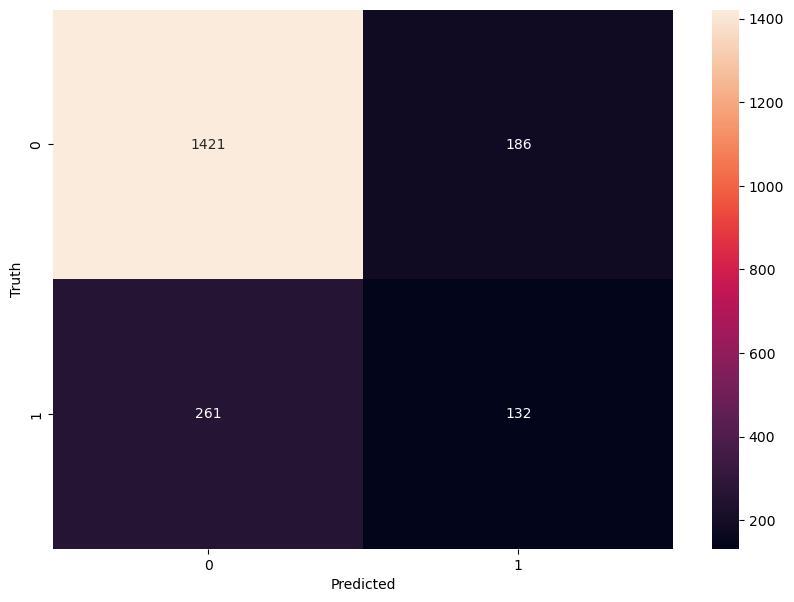

In [38]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')